In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211002/주문3월.csv")
data = data.dropna(axis = 0, how = 'any')
# data = pd.read_csv("/content/drive/MyDrive/2021/2021년 미래기술 챌린지_211005/주문데이터/1-1. 이커머스 FC주문 데이터_3월.csv")
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CORP_ID,REF_ORD_NO,BKG_NO,BKG_TYP,BKG_DATE,BKG_TIME,SHPR_CD,INV_AMT,ITEM_SEQ,ITEM_CD,BRAND_NM,ITEM_QTY,ITEM_AMT,IF_YN,ORDER_CRT_DATETIME,DLV_DV,REF_ITEM_SEQ,ORDER_IDX,ORDER_YN,DLVPREARRBRANCD,DLVPREARREMPNICKNM,DLVCLSFCD,DLVSUBCLSFCD,INS_ID,INS_DATE,INS_TIME,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,단일상품,1,15900.0,N,2.021030e+13,1.0,2021030323897661,2021030323897661,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309344,KX007,2021040163699601,KX007210401807627,7,20210331,234559,90001582,43600.0,1,4789343708_1,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124264101,2021040124264101,Y,L21A,M18,6M31,1,iNEXBatch,20210401,174255,38.0,N,경기도,안산시,경상북도,경주시
309345,KX007,2021040163729011,KX007210401807628,7,20210331,234749,90001582,26000.0,1,4624612404_16,조합형옵션상품,1,26000.0,N,2.021033e+13,1.0,2021040124312901,2021040124312901,Y,1877,J16,1P45,3,iNEXBatch,20210401,174255,5.0,N,경기도,안산시,서울특별시,송파구
309346,KX007,2021040163847431,KX007210401807225,7,20210331,235454,90001582,70800.0,1,2012852981_3,조합형옵션상품,1,70800.0,N,2.021033e+13,1.0,2021040124512081,2021040124512081,Y,6114,I73,6N85,0p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,사하구
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구


In [50]:
col_dic = {'CORP_ID' : '창고코드', 
           'REF_ORD_NO' : '고객 주문번호', 
           'BKG_NO' : 'CJ대한통운 주문번호(예약번호)', 
           'BKG_TYP' : '주문유형',#(7: B2C출고, 8: 정상반출, 9: 불량반출) 
           'BKG_DATE' : '주문날짜',
           'BKG_TIME' : '주문시간',
           'SHPR_CD' : '고객사코드',
           'INV_AMT' : '주문금액',
           'ITEM_SEQ' : '품목순번',
           'ITEM_CD' : '품목코드',
           'BRAND_NM' : '브랜드',
           'ITEM_QTY' : '품목수량',
           'ITEM_AMT' : '품목금액',
           'IF_YN' : '수신여부',
           'ORDER_CRT_DATETIME' : '주문생성시간',
           'DLV_DV' : '택배구분',
           'REF_ITEM_SEQ' : '상품주문번호',
           'ORDER_IDX' : '중개업체 주문번호',
           'ORDER_YN' : '접수여부',
           'DLVPREARRBRANCD' : '배달예정점소코드',
           'DLVPREARREMPNICKNM' : '배달예정사원분류코드',
           'DLVCLSFCD' : '배달터미널코드',
           'DLVSUBCLSFCD' : '배달터미널 소분류코드',
           'INS_ID' : '입력자ID',
           'INS_DATE' : '입력일자(인터페이스 시간)',
           'INS_TIME' : '입력시간(인터페이스 시간)',
           'POST_ZONE' : '권역구분',
           'SPLIT_EXEC_YN' : '배송처별 주문분할여부',
           'SHPR_ADDR_1' : '송화인 주소1',
           'SHPR_ADDR_2' : '송화인 주소2',
           'CNEE_ADDR_1' : '수화인 주소1',
           'CNEE_ADDR_2' : '수화인 주소2'
           }
data.rename(columns = col_dic, inplace = True)
data

,창고코드,고객 주문번호,CJ대한통운 주문번호(예약번호),주문유형,주문날짜,주문시간,고객사코드,주문금액,품목순번,품목코드,브랜드,품목수량,품목금액,수신여부,주문생성시간,택배구분,상품주문번호,중개업체 주문번호,접수여부,배달예정점소코드,배달예정사원분류코드,배달터미널코드,배달터미널 소분류코드,입력자ID,입력일자(인터페이스 시간),입력시간(인터페이스 시간),권역구분,배송처별 주문분할여부,송화인 주소1,송화인 주소2,수화인 주소1,수화인 주소2
1,KX007,2021030365922951,KX007210303371080,7,20210303,35521,90001441,20900.0,1,4610261043_2,조합형옵션상품,1,20900.0,N,2.021030e+13,1.0,2021030323885721,2021030323885721,Y,6427,M09,6R67,4,iNEXBatch,20210303,131425,50.0,N,경기도,광주시,경상남도,김해시
2,KX007,2021030365924361,KX007210303371081,7,20210303,35513,90001441,37900.0,1,4936599538_1,조합형옵션상품,1,37900.0,N,2.021030e+13,1.0,2021030323887981,2021030323887981,Y,6158,L32,9Y25,0,iNEXBatch,20210303,131425,53.0,N,경기도,광주시,경상남도,거제시
3,KX007,2021030365928921,KX007210303371205,7,20210303,35608,90001542,69800.0,1,3858391637_1,조합형옵션상품,1,69800.0,N,2.021030e+13,1.0,2021030323895281,2021030323895281,Y,8909,D21,1N65,1,iNEXBatch,20210303,131425,6.0,N,경기도,광주시,서울특별시,서초구
4,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,1,4631307460,단일상품,1,39800.0,N,2.021030e+13,1.0,2021030323897651,2021030323897651,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
5,KX007,2021030365930451,KX007210303370967,7,20210303,35551,90001341,73700.0,2,2475138283,단일상품,1,15900.0,N,2.021030e+13,1.0,2021030323897661,2021030323897661,Y,2777,R15,3D84,1,iNEXBatch,20210303,131425,10.0,N,경기도,광주시,경기도,김포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309344,KX007,2021040163699601,KX007210401807627,7,20210331,234559,90001582,43600.0,1,4789343708_1,조합형옵션상품,1,43600.0,N,2.021033e+13,1.0,2021040124264101,2021040124264101,Y,L21A,M18,6M31,1,iNEXBatch,20210401,174255,38.0,N,경기도,안산시,경상북도,경주시
309345,KX007,2021040163729011,KX007210401807628,7,20210331,234749,90001582,26000.0,1,4624612404_16,조합형옵션상품,1,26000.0,N,2.021033e+13,1.0,2021040124312901,2021040124312901,Y,1877,J16,1P45,3,iNEXBatch,20210401,174255,5.0,N,경기도,안산시,서울특별시,송파구
309346,KX007,2021040163847431,KX007210401807225,7,20210331,235454,90001582,70800.0,1,2012852981_3,조합형옵션상품,1,70800.0,N,2.021033e+13,1.0,2021040124512081,2021040124512081,Y,6114,I73,6N85,0p,iNEXBatch,20210401,174255,49.0,N,경기도,안산시,부산광역시,사하구
309347,KX007,2021040163863411,KX007210401807629,7,20210331,235554,90001582,19500.0,1,161523952_5,조합형옵션상품,1,19500.0,N,2.021033e+13,1.0,2021040124539761,2021040124539761,Y,M53P,G50,6R69,2p,iNEXBatch,20210401,174255,46.0,N,경기도,안산시,부산광역시,북구


# 품목수량

In [46]:
data.info(), data.품목수량.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279851 entries, 1 to 309348
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   창고코드               279851 non-null  object 
 1   고객 주문번호            279851 non-null  object 
 2   CJ대한통운 주문번호(예약번호)  279851 non-null  object 
 3   주문유형               279851 non-null  int64  
 4   주문날짜               279851 non-null  int64  
 5   주문시간               279851 non-null  int64  
 6   고객사코드              279851 non-null  int64  
 7   주문금액               279851 non-null  float64
 8   품목순번               279851 non-null  int64  
 9   품목코드               279851 non-null  object 
 10  브랜드                279851 non-null  object 
 11  품목수량               279851 non-null  int64  
 12  품목금액               279851 non-null  float64
 13  수신여부               279851 non-null  object 
 14  주문생성시간             279851 non-null  float64
 15  택배구분               279851 non-null  float64
 16  상품

(None, count    279851.000000
 mean          1.307206
 std           2.398788
 min           1.000000
 25%           1.000000
 50%           1.000000
 75%           1.000000
 max         510.000000
 Name: 품목수량, dtype: float64)

# 품목코드

In [ ]:
code = sorted(data.품목코드.unique())
dic = {}
for c in code:
  dic[c] = sum(data.loc[(data.품목코드 == c)].품목수량) # /sum(data.품목수량)
dic
## 품목코드별 품목수량

5320


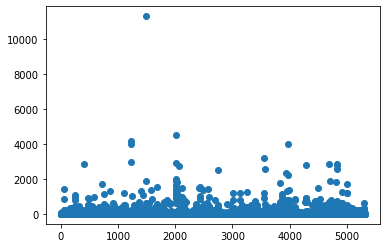

In [37]:
import matplotlib.pyplot as plt

tmp = list(dic.values())
tmp2 = list(dic.keys())

print(len(tmp))
plt.plot(np.arange(len(tmp)), tmp, 'o')


## 품목별 수량이 2000개 안쪽이며, 대부분 100~300 안쪽
## 많이 주문하는 것의 품명을 알면 납득이 될 수 있겠지만 품명 column이 빠져있어서 코드만으로 어떤 물품인지 알 수 없음..

In [38]:
import seaborn as sns
df = pd.DataFrame(tmp,columns=['코드별 총수량'])
df['품목코드'] = tmp2
df

,코드별 총수량,품목코드
0,1,1001085318
1,7,1001240388
2,23,1001284472
3,1,1001429503
4,2,1001524487
...,...,...
5315,6,735554430_6
5316,3,737440835_1
5317,3,738499058
5318,4,759422245_1


(0.0, 15000.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_te

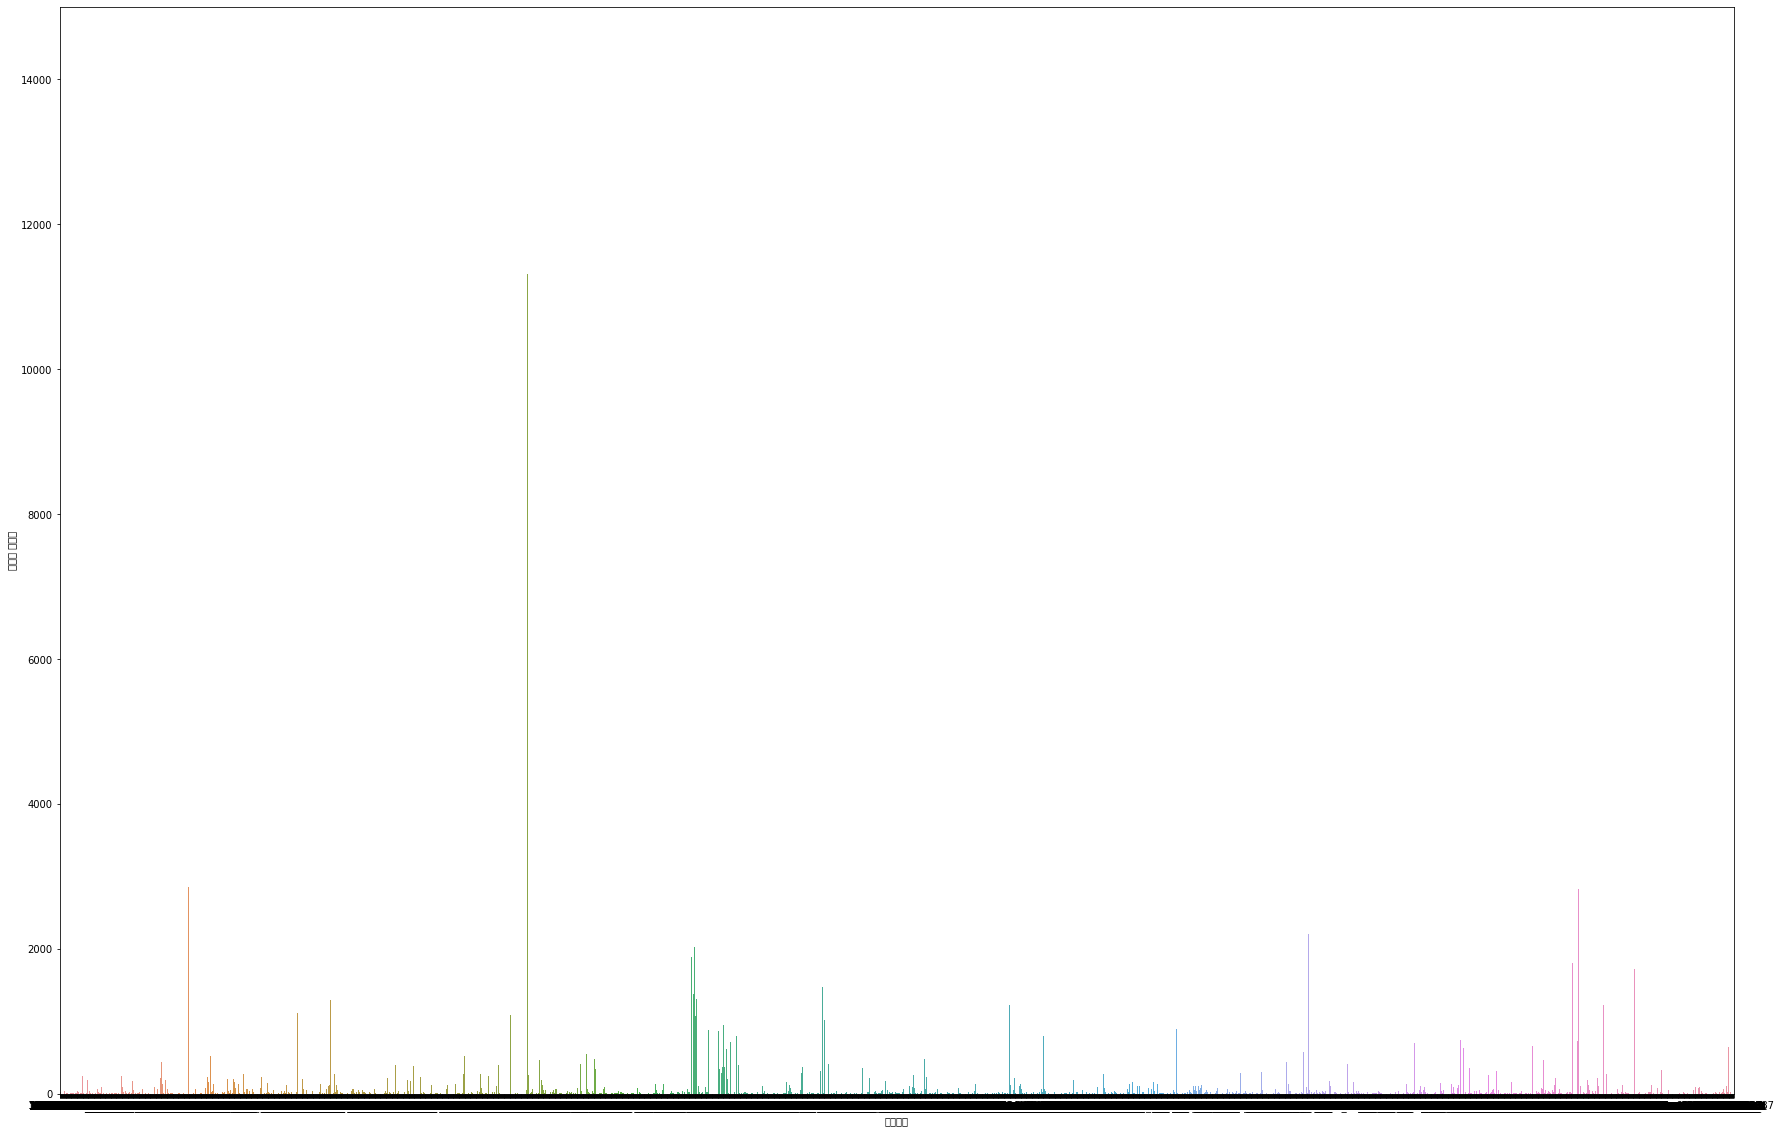

In [39]:
plt.figure(figsize=(30,20))
sns.barplot(
    data= df,
    x= "품목코드",
    y= "코드별 총수량"
)
plt.ylim(0, 15000)

## 막대그래프로 그려봤지만 보기 힘들다

In [40]:
date = sorted(data.주문날짜.unique())
date_dic = {}
for d in date:
  date_dic[d] = sum(data.loc[(data.주문날짜 == d)].품목수량) #/ sum(data.품목수량)
date_dic

## 주문날짜별 총수량
## 3월 23일이 유독 많은 주문량이 보임

{20210301: 10213,
 20210302: 14127,
 20210303: 15950,
 20210304: 11972,
 20210305: 14636,
 20210306: 6794,
 20210307: 7715,
 20210308: 10252,
 20210309: 9764,
 20210310: 8991,
 20210311: 8806,
 20210312: 7795,
 20210313: 7226,
 20210314: 10302,
 20210315: 10514,
 20210316: 13519,
 20210317: 9480,
 20210318: 9265,
 20210319: 9503,
 20210320: 7004,
 20210321: 10284,
 20210322: 24721,
 20210323: 33197,
 20210324: 11923,
 20210325: 11724,
 20210326: 12496,
 20210327: 9177,
 20210328: 10805,
 20210329: 14818,
 20210330: 10510,
 20210331: 12340}

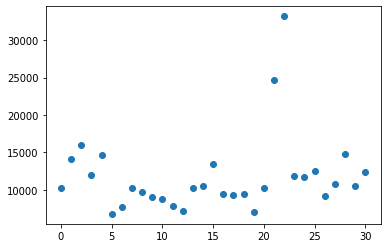

In [41]:
date_per_cnt = list(date_dic.values())
order_date = list(date_dic.keys())

plt.plot(np.arange(len(date_per_cnt)), date_per_cnt, 'o')

In [42]:
df2 = pd.DataFrame(order_date,columns=['주문날짜'])
df2['일별수량'] = date_per_cnt
df2

,주문날짜,일별수량
0,20210301,10213
1,20210302,14127
2,20210303,15950
3,20210304,11972
4,20210305,14636
5,20210306,6794
6,20210307,7715
7,20210308,10252
8,20210309,9764
9,20210310,8991


(0.0, 35000.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_te

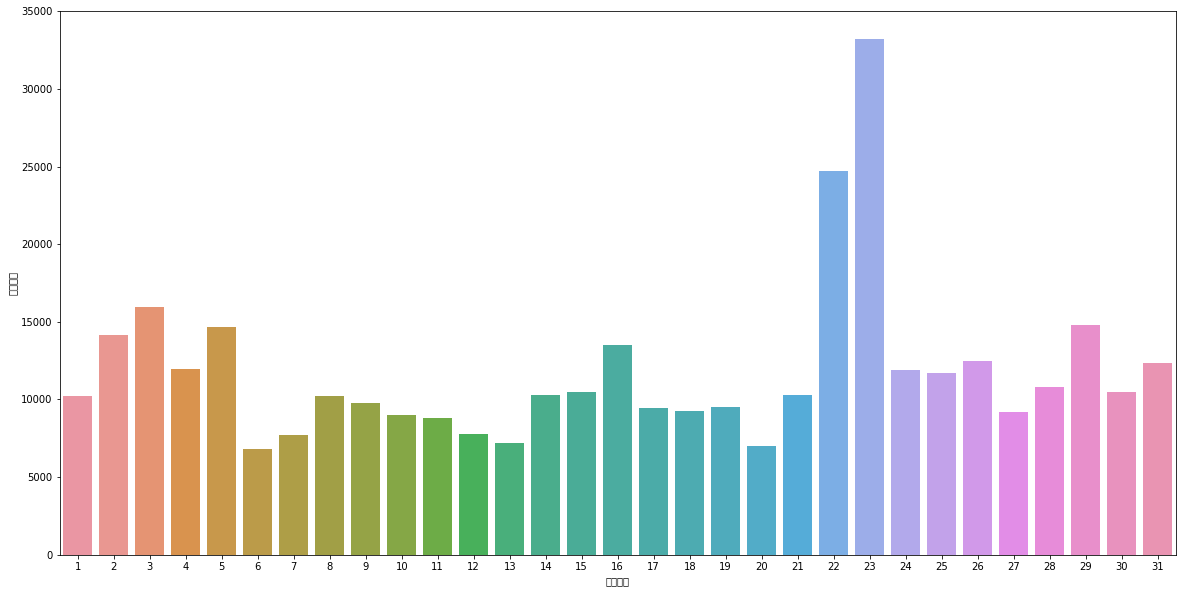

In [43]:
df2.주문날짜 = df2.주문날짜 % 100
plt.figure(figsize=(20,10))
sns.barplot(
    data= df2,
    x= "주문날짜",
    y= "일별수량"
)
plt.ylim(0, 35000)

## 22일 23일이 유독 주문이 많음 어떤 품목이 주문이 되었는지 확인해봐야 함

In [44]:
product_per_date = pd.DataFrame(data.loc[(data.품목수량 > 100)].주문날짜,columns=['주문날짜'])
product_per_date['품목코드'] = data.loc[(data.품목수량 > 100)].품목코드
product_per_date['품목수량'] = data.loc[(data.품목수량 > 100)].품목수량
product_per_date

## 5189275561_2, 5102624996, 5102591063, 5102599276 네 가지 품목이 여러번 주문 되었고 해당 품목은 원래 주문량이 100단위인 것으로 판단

,주문날짜,품목코드,품목수량
78462,20210309,5189278114,200
79764,20210308,5189275561_2,200
81073,20210309,5118509252,150
117117,20210315,5176584535,138
125818,20210315,5189275561_2,120
130542,20210316,5426872253,180
134142,20210316,5174762225,120
144415,20210318,5102624996,500
149807,20210318,5102591063,120
154244,20210319,5174765354,192


In [45]:
data.loc[(data.품목수량 > 100)].주문날짜

78462     20210309
79764     20210308
81073     20210309
117117    20210315
125818    20210315
130542    20210316
134142    20210316
144415    20210318
149807    20210318
154244    20210319
158103    20210319
158322    20210319
176059    20210322
176060    20210322
229473    20210324
234692    20210325
245183    20210325
Name: 주문날짜, dtype: int64